In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv("data/stud.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
y = data["math_score"]
x = data.drop("math_score",axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

num_feature = x.select_dtypes(exclude="object").columns
cat_feature = x.select_dtypes(include="object").columns

std_scaler = StandardScaler()
ohe = OneHotEncoder()

col_transformer = ColumnTransformer([
    ("StandardScaler",std_scaler,num_feature),
    ("OHE",ohe,cat_feature)
],remainder="passthrough")

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

xtrain_scaled = col_transformer.fit_transform(xtrain)

In [6]:
xtest_scaled = col_transformer.transform(xtest)
xtest_scaled

array([[ 1.13786619,  1.03103224,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.24597837,  0.30139141,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.23836723,  0.23506043,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.79190505,  0.50038436,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.51513614,  0.36772239,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.30755945,  0.23506043,  1.        , ...,  1.        ,
         1.        ,  0.        ]], shape=(200, 19))

In [7]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def evaluation(test,predicted):
    r2 = r2_score(test,predicted)
    mse = mean_squared_error(test,predicted)
    mae = mean_absolute_error(test,predicted)

    return r2,mse,mae

In [8]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "XGBRegressor":XGBRegressor(),
    "SVR":SVR()
}

model_name = []
model_r2_score = []

In [9]:
for i in models.keys():
    model_name.append(i)
    model = models[i]
    model.fit(xtrain_scaled,ytrain)
    ypred = model.predict(xtest_scaled)
    r2_train,mse_train,mae_train = evaluation(ytrain,model.predict(xtrain_scaled))
    r2_test,mse_test,mae_test = evaluation(ytest,ypred)
    model_r2_score.append(r2_test)

    print(i)
    print("For Training:")
    print(f'R2 Score: {r2_train}')
    print(f'MSE: {mse_train}')
    print(f'MAE: {mae_train}\n')
    print("For Testing:")
    print(f'R2 Score: {r2_test}')
    print(f'MSE: {mse_test}')
    print(f'MAE: {mae_test}')
    print("---------------------------------\n")

LinearRegression
For Training:
R2 Score: 0.8743172040139593
MSE: 28.33487038064859
MAE: 4.266711846071956

For Testing:
R2 Score: 0.8804332983749565
MSE: 29.095169866715477
MAE: 4.21476314247485
---------------------------------

Lasso
For Training:
R2 Score: 0.8072231322208645
MSE: 43.46106018771194
MAE: 5.205260274468427

For Testing:
R2 Score: 0.8254465092551198
MSE: 42.47556715227398
MAE: 5.155701094273798
---------------------------------

Ridge
For Training:
R2 Score: 0.8743044675204545
MSE: 28.337741791088884
MAE: 4.265005112727168

For Testing:
R2 Score: 0.8805917946912825
MSE: 29.056601626694817
MAE: 4.211112826071163
---------------------------------

DecisionTreeRegressor
For Training:
R2 Score: 0.9996534669718089
MSE: 0.078125
MAE: 0.01875

For Testing:
R2 Score: 0.7300056218007516
MSE: 65.7
MAE: 6.4
---------------------------------

RandomForestRegressor
For Training:
R2 Score: 0.9770714590046742
MSE: 5.169181923611111
MAE: 1.802460416666667

For Testing:
R2 Score: 0.8528

In [10]:
pd.DataFrame(data = list(zip(model_name,model_r2_score)),columns=["Model_Name","R2_Score"]).sort_values(by="R2_Score",ascending=False)

,Model_Name,R2_Score
2,Ridge,0.880592
0,LinearRegression,0.880433
4,RandomForestRegressor,0.852866
5,CatBoostRegressor,0.851831
1,Lasso,0.825447
6,XGBRegressor,0.821221
3,DecisionTreeRegressor,0.730006
7,SVR,0.729105


In [12]:
model = LinearRegression()
model.fit(xtrain_scaled,ytrain)
ypred = model.predict(xtest_scaled)

Text(0, 0.5, 'Predicted')

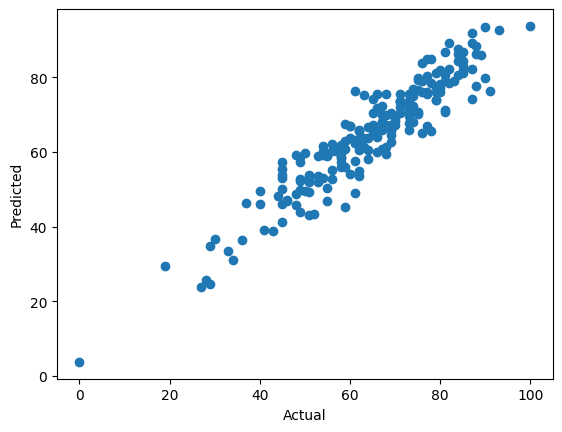

In [17]:
import matplotlib.pyplot as plt

plt.scatter(ytest,ypred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

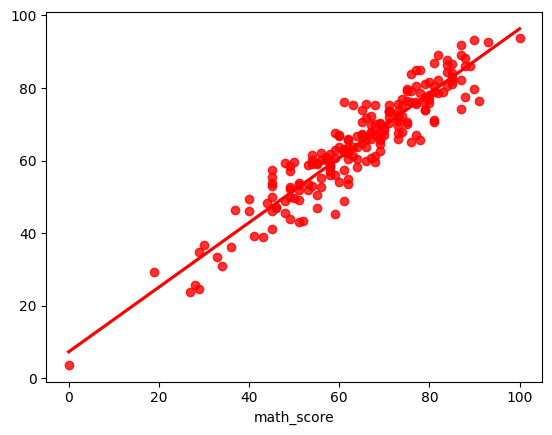

In [20]:
import seaborn as sb

sb.regplot(x=ytest,y=ypred,ci=None,color="red")